# Onderzoeksvraag 1

1. **In hoeverre is de prijs van de rit te voorspellen op basis van de andere kenmerken?**
   
In dit segment onderzoeken we welke kenmerken in onze dataset kunnen bijdragen aan het ontwikkelen van een model dat de prijs van een taxirit nauwkeurig kan voorspellen.
Omdat wij de categorie "price" willen gaan predicten gaan wij een regressie model toepassen.

- <a href="#L_importeren">Librarys importeren</a>
- <a href="#Data_analyse">Data-analyse</a>
- <a href="#Data_preprocessing">Data-preprocessing</a>
- <a href="#Model_creeren">Model creëren</a>
    - <a href="#Model_evalueren">Model evalueren</a>
- <a href="#Andere_modellen_evalueren">Andere modellen</a>
- <a href="#Conclusie">Conclusie</a>

<a id ="L_importeren"></a>
## Librarys importeren

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns 
import pandas as pd


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\aofie\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\aofie\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\aofie\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\aofie\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\aofie\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\aofie\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



In [53]:
df = pd.read_csv("taxi_dataset.csv")
df.head()

,id,name,price,surge_multiplier,timestamp,datetime,timezone,source,destination,latitude,longitude,distance
0,009e9c53-074d-43cf-aef2-0fbc7a47ed3d,UberXL,12.0,1.0,1.543616e+09,2018-11-30 22:13:01,America/New_York,North End,West End,42.3647,-71.0542,1.11
1,23f145da-f0c1-4d1f-a184-496bc003a7db,Black,16.0,1.0,1.544698e+09,2018-12-13 10:50:11,America/New_York,North End,West End,42.3647,-71.0542,1.11
2,357559cb-8c58-4278-a41a-e33b2e0997a3,UberX,7.5,1.0,1.544729e+09,2018-12-13 19:15:03,America/New_York,North End,West End,42.3647,-71.0542,1.11
3,50ef1165-9d23-416c-a65c-18906207b295,WAV,7.5,1.0,1.545005e+09,2018-12-16 23:55:11,America/New_York,North End,West End,42.3647,-71.0542,1.11
4,91c4861c-1780-42b0-bca1-bbd64a422cc3,Black SUV,26.0,1.0,1.544748e+09,2018-12-14 00:40:07,America/New_York,North End,West End,42.3647,-71.0542,1.11


## Data Analyze

Hier boven kunnen we zien wat het gemideld kost en wat de gemildeld afstand is dit hebben we gebruikt om een beter begrip te grijgen over de database.

Afhankelijke variabele:

Price: Dit is de variabele die je probeert te voorspellen of te verklaren, dus het is de afhankelijke variabele.

Onafhankelijke variabelen:

Dit zijn de variabelen die kunnen helpen bij het voorspellen van de prijs.

Surge_multiplier: Een verhogingsfactor die aangeeft of er een toeslag is toegepast op de ritprijs.
Timestamp: De UNIX-tijdstempel die aangeeft wanneer de rit plaatsvond.
Datetime: De datum en tijd waarop de rit plaatsvond (afgeleid van de timestamp).
Timezone: De tijdzone waarin de rit plaatsvond.
Source: De vertrekplaats van de rit.
Destination: De bestemming van de rit.
Latitude: De breedtegraad van de locatie (mogelijk relevant voor ruimtelijke analyse).
Longitude: De lengtegraad van de locatie.
Distance: De afstand van de rit.
Name (type of taxi): Het type taxi dat werd gebruikt (bijvoorbeeld UberX, Black SUV).

meetniveau
1. Price: Ratio 
2. Surge_multiplier: Ratio
3. Timestamp: Interval
4. Datetime: Interval
5. Timezone: Nominaal
6. Source: Nominaal
7. Destination: Nominaal
8. Latitude: Interval
9. Longitude: Interval
10. Distance: Ratio
11. Name (type auto): Nominaal

Als eerst gaan we op ongefilterde data een analyze doen

In [3]:
label_encoder = LabelEncoder()

complete_df_encoded = df.copy()
for column in complete_df_encoded.columns:
    if complete_df_encoded[column].dtype == 'object':
        complete_df_encoded[column] = label_encoder.fit_transform(complete_df_encoded[column])

<Axes: title={'center': 'price'}, xlabel='name'>

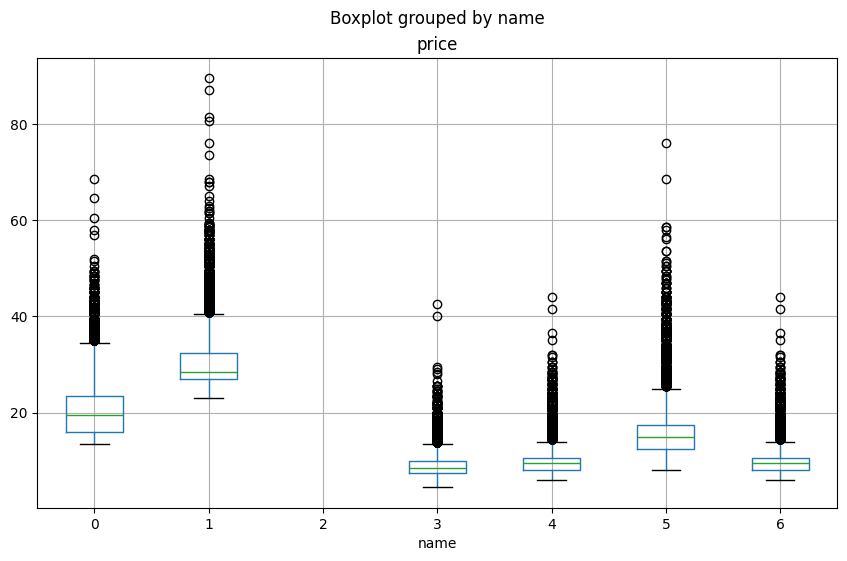

In [4]:
complete_df_encoded.boxplot(column='price', by='name', figsize=(10, 6))

Zoals te zien is in deze boxplot, zijn er veel 'fliers', oftewel uitschieters. Deze uitschieters zullen tijdens het preprocessen worden verwijderd om betere voorspellingsresultaten te verkrijgen. Uitschieters kunnen namelijk invloed hebben op de helling van het regressiemodel.

**Kolommen die worden verwijderd:**
- Id: De kolom Id is voor elke rij uniek. Dit komt waarschijnlijk doordat de dataset uit een database is gehaald.
- Surge multiplier en timezone: Deze kolommen zijn constant en dragen daarom niet bij aan de voorspelling van onze decision trees.
- Datetime: De kolom datetime bevat dezelfde informatie als timestamp, maar dan geformatteerd als een datetime-object.

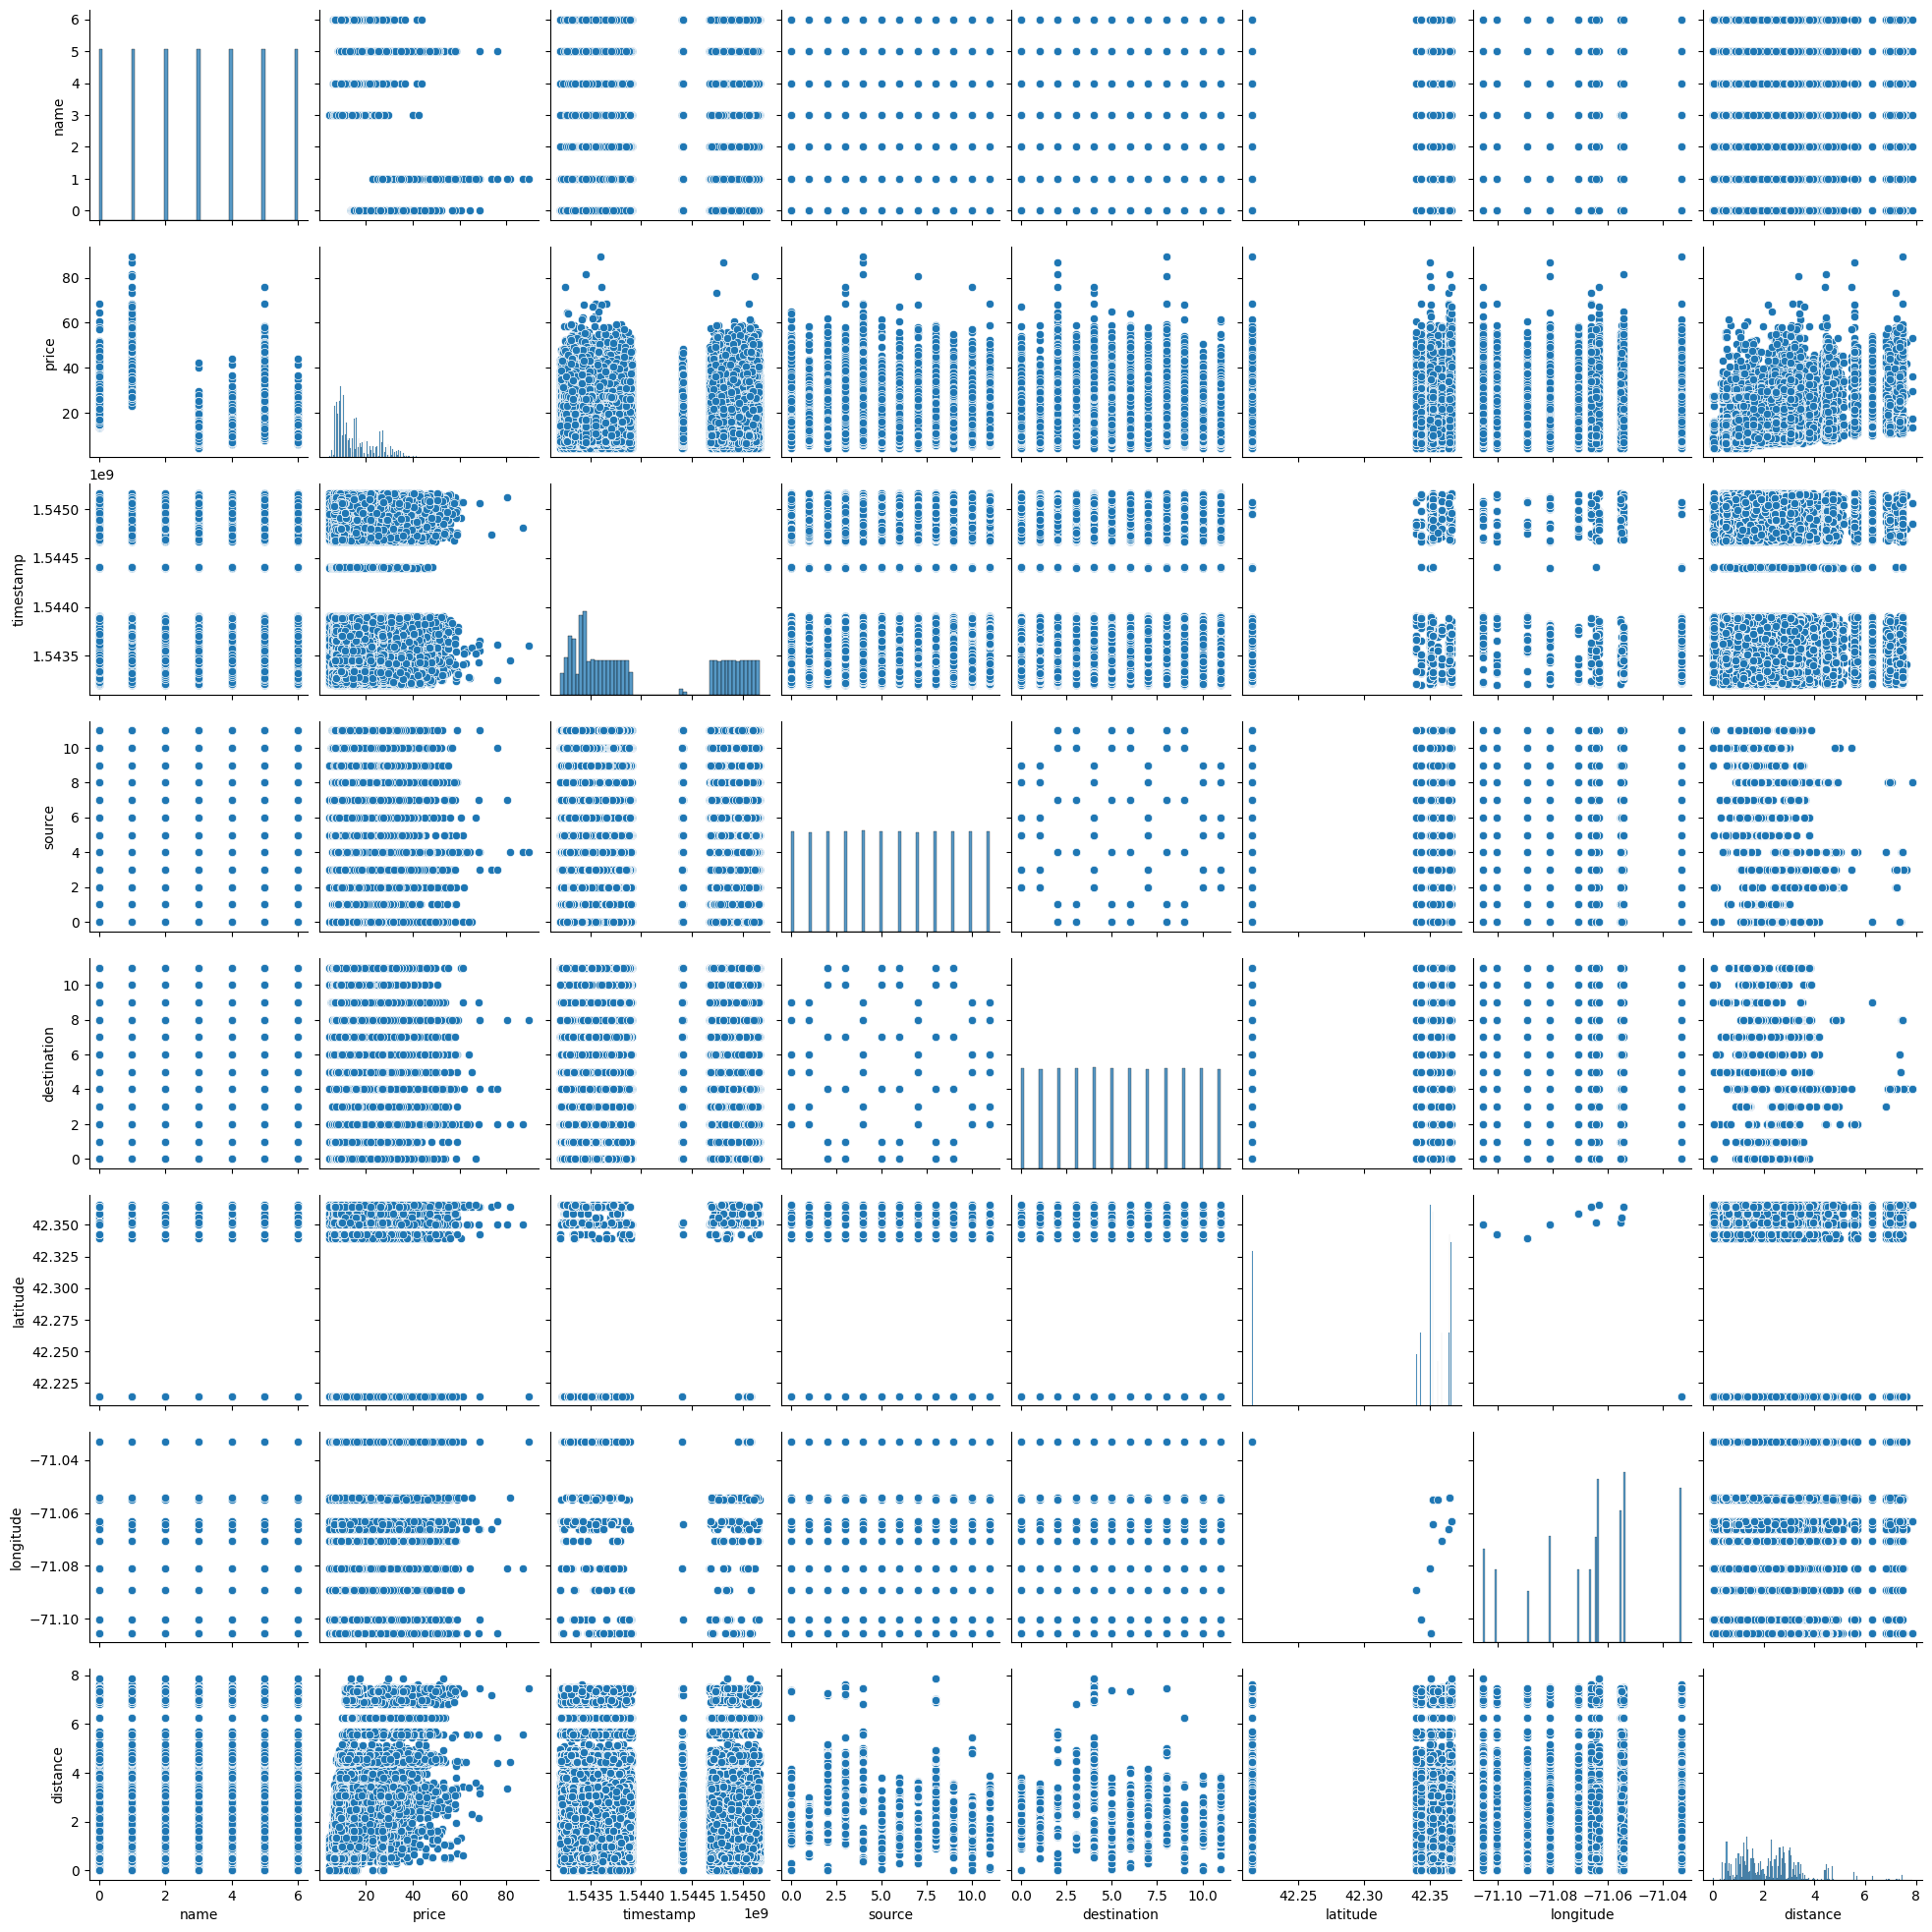

In [5]:
sns.pairplot(complete_df_encoded.drop(columns=["id", "surge_multiplier", "timezone", "datetime"]))

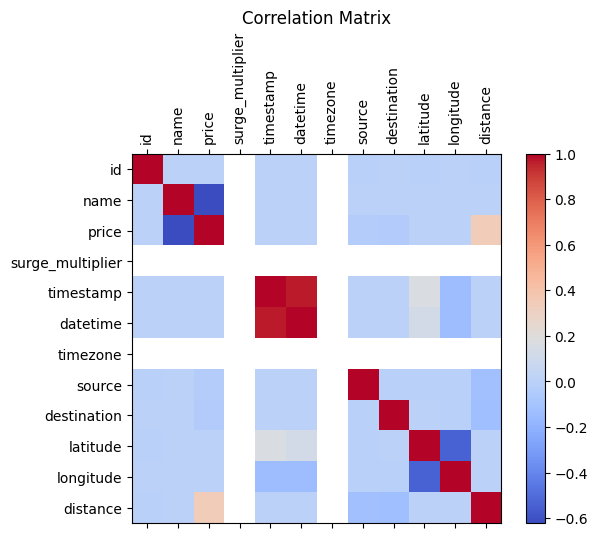

In [6]:
correlation_matrix = complete_df_encoded.corr()
c

Uit de Correlation matrix kunnen we weergeven dat alleen de name en distance een correlatie hebben met de price. Deze gaan we daarom alleen ook gebruiken. de source en distance hebben ook een kleine correlatie, maar de afstand tussen die is distance kolomn daarom kies ik er voor om alleen de distance kolomn te gebruiken.

<a id="Data_preprocessing"></a>
## Data-preprocessing

Aangezien we al een source- en destination-kolom hebben, hoeven we de latitude en longitude niet op te nemen in het model. Dit zijn slechts coördinaten en voegen daarom weinig waarde toe.

Uit ons onderzoek blijkt bovendien dat alle rijen met de naam "taxi" geen prijs bevatten. We kunnen hiervoor geen prijs toevoegen, omdat we hebben vastgesteld dat er een correlatie bestaat tussen de prijs en de naam.

Daarnaast verwijderen we dubbele rijen om de dataset schoon te houden.

Ook verwijderen we de source- en destination-kolommen, omdat deze redundant zijn; de afstand tussen deze twee locaties vertegenwoordigt al de onderliggende relatie.

Uit verder onderzoek na het uitvoeren van de modellen blijkt dat de timestamp nauwelijks invloed heeft op de voorspelling van de prijs. Dit is ook zichtbaar in de scatterplot hierboven, waaruit blijkt dat deze feature weinig bijdraagt aan de nauwkeurigheid van het model in vergelijking met andere kenmerken.

Verder kunnen we waarnemen dat alleen de distance- en name-kolommen een correlatie hebben met de prijs. Dit zijn dan ook de enige features die we in het model zullen gebruiken.

In [54]:
df_cleaned = df.copy()

In [55]:
df_cleaned = df_cleaned.convert_dtypes()
df_cleaned = df_cleaned[df_cleaned["name"] != "Taxi"]
df_cleaned = df_cleaned.drop_duplicates()

We verwijderen nu de uitschieters door voor elke rij de z-score te berekenen. Vervolgens filteren we de data door alleen de rijen te behouden met een z-score tussen -3 en 2,2 standaarddeviaties.

In [56]:
# calculating Z score for "price" column
df_cleaned = df_cleaned.dropna()
# calculate for each name the average price and standard deviation
price_mean = df_cleaned.groupby("name")["price"].mean()
price_std = df_cleaned.groupby("name")["price"].std()

In [57]:
# remove the rows where the price is more than 3 standard deviations away from the mean
df_cleaned = df_cleaned.join(price_mean, on="name", rsuffix="_mean")
df_cleaned = df_cleaned.join(price_std, on="name", rsuffix="_std")
df_cleaned["price_zscore"] = (df_cleaned["price"] - df_cleaned["price_mean"]) / df_cleaned["price_std"]

df_cleaned = df_cleaned[df_cleaned["price_zscore"] >= -3]
df_cleaned = df_cleaned[df_cleaned["price_zscore"] <= 2.2]

In [58]:
df_cleaned = df_cleaned.drop(columns=["price_mean", "price_std", "price_zscore"])

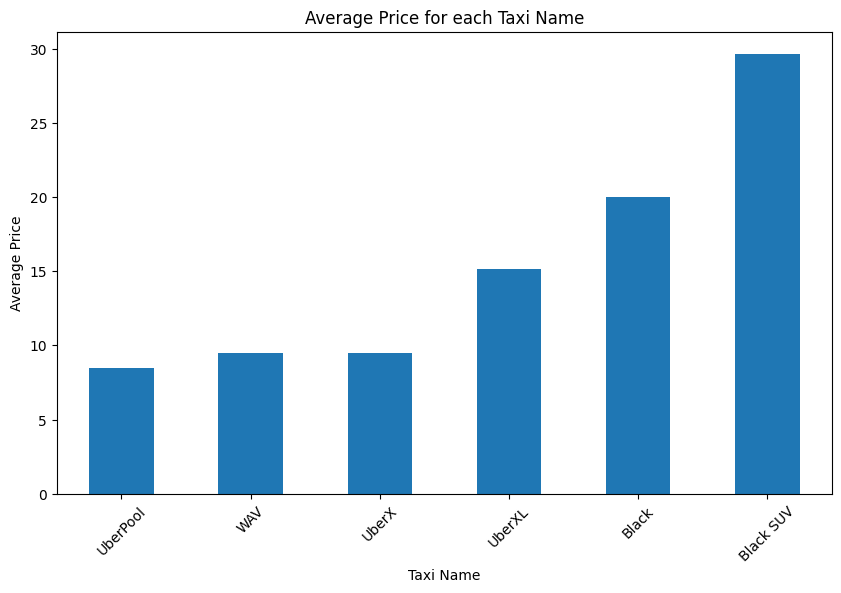

In [61]:
# Compute average price per taxi name
average_price = df_cleaned.groupby("name")["price"].mean().sort_values()
average_price.plot(kind='bar', figsize=(10, 6))
plt.title("Average Price for each Taxi Name")
plt.ylabel("Average Price")
# rotate the x-axis labels to make them readable
plt.xticks(rotation=45)
plt.xlabel("Taxi Name")
plt.show()

Deze code zet de categorische waarden in de kolom 'name' om in numerieke labels met behulp van LabelEncoder. Regressiemodellen vereisen numerieke inputs.

In [45]:
df_cleaned['name'] = LabelEncoder().fit_transform(df_cleaned['name'])

<Axes: title={'center': 'price'}, xlabel='name'>

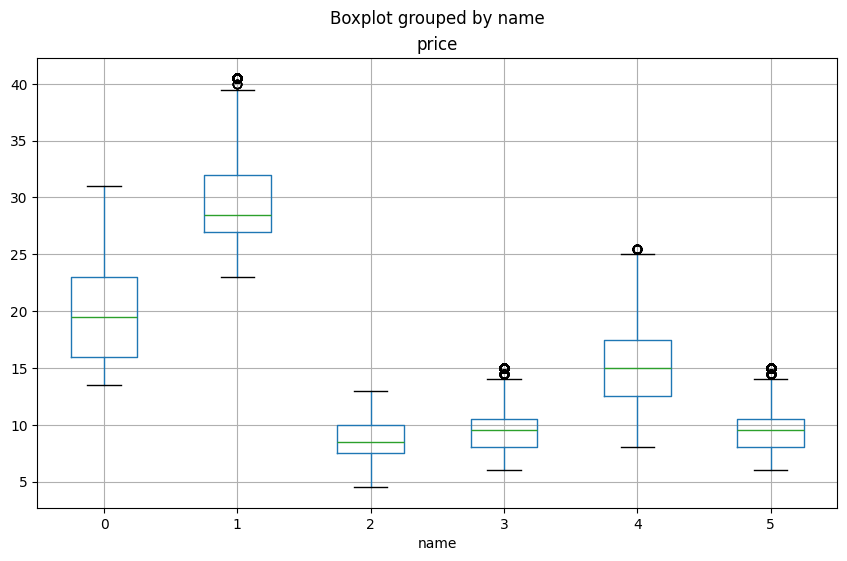

In [46]:
df_cleaned.boxplot(column='price', by="name", figsize=(10, 6))

In deze boxplot zien we dat, in vergelijking met de prijs, vrijwel alle uitschieters per naam zijn verwijderd. Aangezien de naam de sterkste correlatie heeft met de prijs, zal dit later een verbetering opleveren voor ons model.

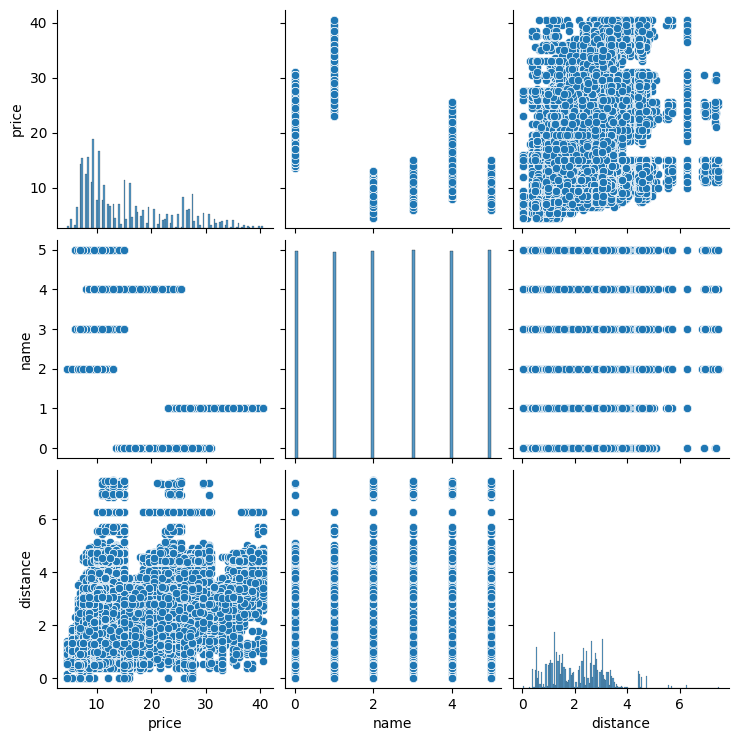

In [14]:
sns.pairplot(df_cleaned[["price", "name", "distance"]])

<a id="Model_creeren"></a>
## Model creëren

In [15]:
df["name"] = LabelEncoder().fit_transform(df["name"])

In [16]:
# X = df_cleaned.drop(["price"], axis=1)
X = df_cleaned[["name", "distance"]]
y = df_cleaned["price"]

We gaan nu de test- en trainset creëren.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

GridSearchCV: Het vinden van de beste parameters voor ons Decision Tree-model

In deze stap gebruiken we **GridSearchCV** om de optimale parameters voor ons Decision Tree-model te vinden.

> **Let op:** De volgende drie codeblokken kunnen worden overgeslagen omdat dit proces lang kan duren.

De beste parameters voor het regressiemodel zijn al vooraf berekend.

In [ ]:
param_grid = {
    "bootstrap":[True], 
    "max_depth":[15, 20, 25], 
    "min_samples_leaf":[1, 2, 4, 8], 
    "min_samples_split":[2, 5, 10], 
    "n_estimators":[100, 200]
}

In [ ]:
# Intialize the model
model = RandomForestRegressor()
# get best params using GridSearchCV
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

In [ ]:
best_params = grid_search.best_params_
print(f"Best parameters found by GridSearchCV:{best_params}")

In [63]:
best_params = {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}

In [64]:
# Train the model with the best parameters
best_rf = RandomForestRegressor(**best_params, oob_score=True)
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=4, n_estimators=200,
                      oob_score=True)

<a id="Model_evalueren"></a>
### Model evalueren

In deze code wordt het Random Forest-model geëvalueerd op de testdata (X_test). De voorspelde waarden (y_pred) worden vergeleken met de werkelijke waarden (y_test) met behulp van:

- MAE: Gemiddelde absolute fout.
- MSE: Gemiddelde kwadratische fout.
- R²-score: Percentage verklaarde variatie.

Daarnaast wordt de Out-of-Bag (OOB) Score weergegeven als extra maatstaf voor de modelprestaties.

In [65]:
y_pred = best_rf.predict(X_test)

In [66]:
# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"rmse : {np.sqrt(mse)}")
print(f"R^2 Score: {r2}")
print(f"OOB Score: {best_rf.oob_score_}")

Mean Absolute Error: 0.9873013656217017
Mean Squared Error: 1.955166611769637
rmse : 1.3982727243887856
R^2 Score: 0.9704601381776248
OOB Score: 0.9696270409390136


We gaan het model evalueren met de volgende plots: 

- Scatterplot: De linker grafiek toont de relatie tussen de werkelijke (y_test) en voorspelde prijzen (y_pred). Ideaal gezien liggen de punten dicht bij de rode stippellijn, wat zou betekenen dat het model nauwkeurig voorspelt.

- KDE-plot: De rechter grafiek vergelijkt de verdelingen van de werkelijke en voorspelde prijzen met behulp van dichtheidsplots (KDE). Dit laat zien hoe goed de voorspelde verdeling overeenkomt met de werkelijke data.

Deze visualisaties helpen bij het beoordelen van de nauwkeurigheid en betrouwbaarheid van het model.

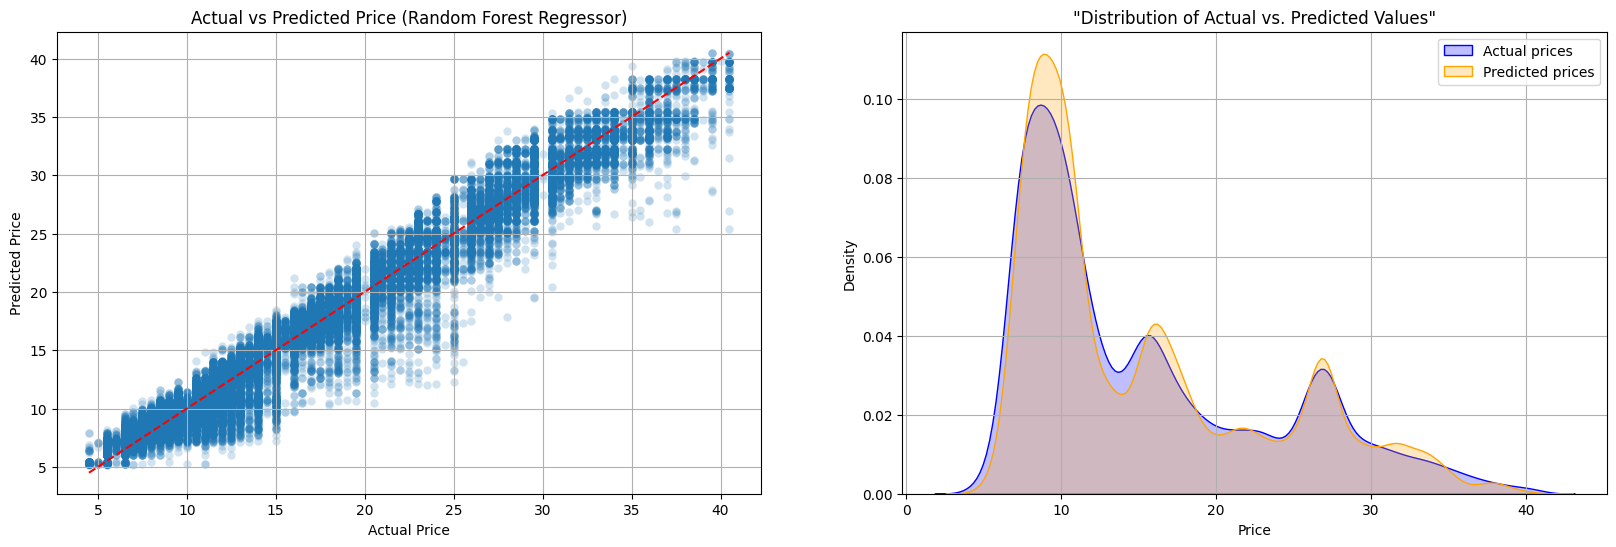

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].scatter(y_test, y_pred, alpha=0.2, marker='o', linewidths=0)
ax[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
ax[0].grid(True)
ax[0].set_xlabel('Actual Price')
ax[0].set_ylabel('Predicted Price')
ax[0].set_title('Actual vs Predicted Price (Random Forest Regressor)')
sns.kdeplot(y_test, label='Actual prices', fill=True, color='blue')
sns.kdeplot(y_pred, label='Predicted prices' , fill=True, color='orange')
ax[1].set_xlabel('Price')
ax[1].grid(True)
ax[1].set_ylabel('Density')
ax[1].set_title('"Distribution of Actual vs. Predicted Values"')
ax[1].legend()
plt.show()

In de linker grafiek (scatterplot) zien we dat de voorspelde prijzen over het algemeen dicht bij de werkelijke prijzen liggen, wat blijkt uit de clustering rond de diagonale rode lijn. Dit geeft aan dat het model een sterke overeenkomst heeft tussen de werkelijke en voorspelde waarden.

De rechter grafiek (KDE-plot) laat zien dat de verdelingen van de werkelijke en voorspelde prijzen grotendeels overeenkomen, hoewel er enkele verschillen zijn in bepaalde prijsklassen. Dit wijst erop dat het model de algemene verdeling van de ritprijzen goed weet te benaderen, maar mogelijk moeite heeft met het nauwkeurig voorspellen van sommige prijsklassen.

De bargrafiek geeft weer hoeveel elke feature bijdraagt aan de voorspellende kracht van het model.

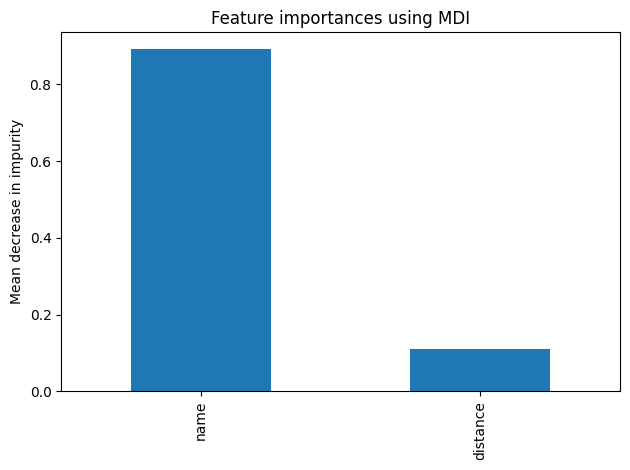

In [23]:
importances = best_rf.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()


<a id="Andere_modellen_evalueren"></a>
## Snel anderen modellen testen

Laten we nu ook snel andere modellen evalueren om te zien of we mogelijk betere resultaten kunnen behalen.
Voor het evalueren van deze modellen kan we dezelfde grafieken begruiken.


GridSearchCV: Het vinden van de beste parameters voor ons KNN model

In deze stap gebruiken we **GridSearchCV** om de optimale parameters voor ons KNN model te vinden.

> **Let op:** De volgende drie codeblokken kunnen worden overgeslagen omdat dit proces lang kan duren.

De beste parameters voor het regressiemodel zijn al vooraf berekend.

In [60]:
# Parameters for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

In [ ]:
# Intialize KNN model
model_knn = KNeighborsRegressor()

# Perform GridSearchCV to get the best parameters
grid_search = GridSearchCV(estimator=model_knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

In [ ]:
best_params = grid_search.best_params_
print(f"Best parameters found:{best_params}")

In [24]:
best_params = {'algorithm': 'auto', 'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}

In [25]:
# Train the model with the best parameters
model_knn = KNeighborsRegressor(**best_params)
model_knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=11)

In [26]:
y_pred = model_knn.predict(X_test)

In [62]:
# evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"rmse : {np.sqrt(mse)}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 1.0319947631075457
Mean Squared Error: 2.1121179160752885
rmse : 1.453312738564996
R^2 Score: 0.9680888211685673


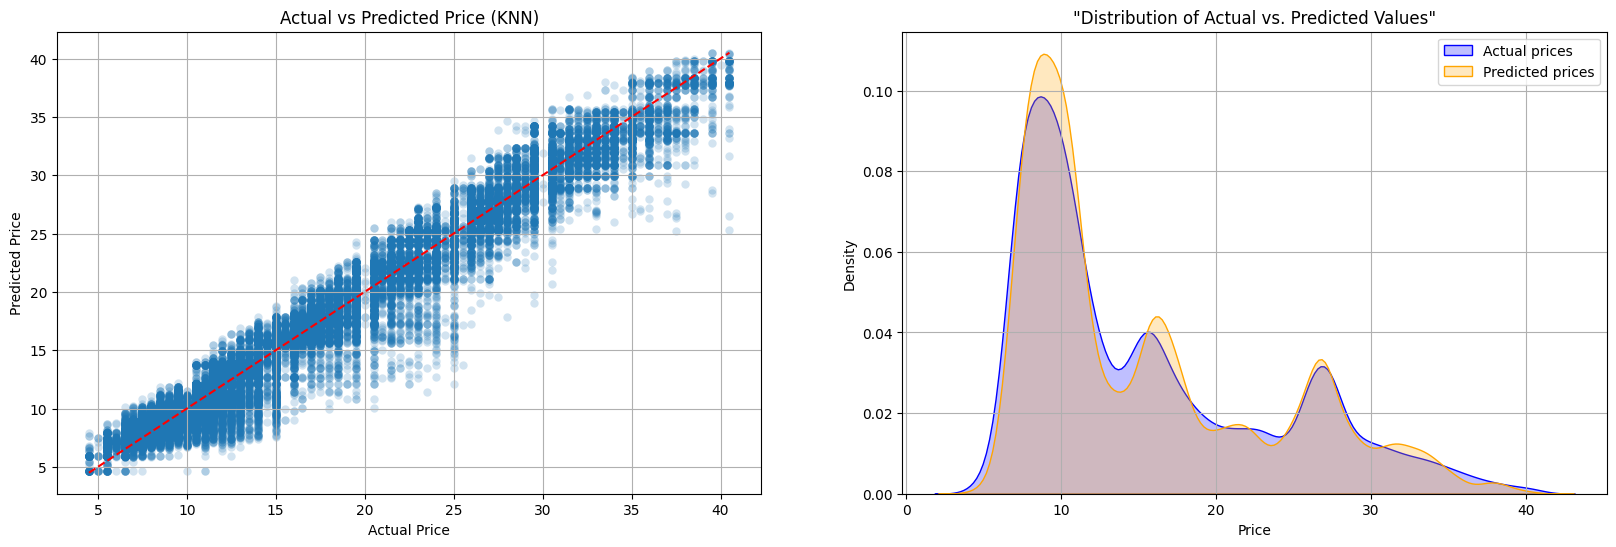

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].scatter(y_test, y_pred, alpha=0.2, marker='o', linewidths=0)
ax[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
ax[0].grid(True)
ax[0].set_xlabel('Actual Price')
ax[0].set_ylabel('Predicted Price')
ax[0].set_title('Actual vs Predicted Price (KNN)')
sns.kdeplot(y_test, label='Actual prices', fill=True, color='blue')
sns.kdeplot(y_pred, label='Predicted prices' , fill=True, color='orange')
ax[1].set_xlabel('Price')
ax[1].grid(True)
ax[1].set_ylabel('Density')
ax[1].set_title('"Distribution of Actual vs. Predicted Values"')
ax[1].legend()
plt.show()

In [30]:
df_cleaned["price"].mean()

np.float64(15.362979179529933)

<a id="Conclusie"></a>
## Conclusie

Het model presteert uitstekend in het voorspellen van de ritprijs, zoals blijkt uit de evaluatiestatistieken en visualisaties. Met een lage Mean Absolute Error (0,99) en Mean Squared Error (1,97) voorspelt het model de prijzen nauwkeurig. De R²-score van 0,97 toont aan dat 97% van de variatie in de ritprijs wordt verklaard door het model. De visualisaties bevestigen deze nauwkeurigheid, met een sterke overeenkomst tussen de werkelijke en voorspelde prijzen. Er is echter nog enige ruimte voor verbetering bij specifieke prijsklassen. 

**Resultaten van de Random Forest Regressor**

- Mean Absolute Error: 0.9873
- Mean Squared Error: 1.9551
- rmse: 1.4
- R^2 Score: 0.9705

**Resultaten van de K Neighbors Regressor**

- Mean Absolute Error: 1.0320
- Mean Squared Error: 2.1121
- rmse: 1.45
- R^2 Score: 0.9681

Gezien de gemiddelde prijs van 15 dollar hebben beide modellen een gemiddelde afwijking van ongeveer 1 tot 1,5 dollar, afhankelijk van de gekozen foutmaat. Op basis van de RMSE bedraagt de fout voor de Random Forest Regressor (RFR) 1,40 dollar en voor de K-Neighbors Regressor (KNR) 1,45 dollar.

Op basis van de resultaten kunnen we concluderen dat de Random Forest Regressor iets beter presteert dan de K Neighbors Regressor bij het voorspellen van de ritprijs. De Random Forest Regressor heeft een lagere Mean Absolute Error (0.99) en Mean Squared Error (1.96) in vergelijking met de K Neighbors Regressor (MAE: 1.03, MSE: 2.11). Daarnaast heeft de Random Forest een iets hogere R²-score (0.97 versus 0.968), wat aangeeft dat het model net iets beter in staat is om de variatie in de prijs te verklaren. Over het algemeen kunnen we stellen dat beide modellen goed presteren, maar de Random Forest Regressor levert de beste resultaten op.